In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras
from keras.layers import LeakyReLU

from google.colab import drive
drive.mount('/content/drive')
mydata_path = '/content/drive/MyDrive/Teaching/ML_Finance/Python/Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Black-Scholes-Merton Option Prices

In [17]:
df = pd.read_csv(mydata_path + 'Option_Data.csv')

y = df[['Option Price with Noise','Option Price']]
X = df[['Spot price', 'Strike Price', 'Risk Free Rate','Volatility','Maturity','Dividend']]


# Divide data into training set and test set(note that random seed is set)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

# Divide training set into training and validation set
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=100)

print(df.shape, X_train.shape, X_val.shape, X_test.shape)


(10000, 9) (6000, 6) (2000, 6) (2000, 6)


In [18]:
scaler = StandardScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_vals = scaler.transform(X_val)
X_scaled_test = scaler.transform(X_test)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

In [ ]:
# Create ML Model
# Sequential function allows you to define your Neural Network in sequential order
# Within Sequential, use Dense function to define number of nodes, activation function and other related parameters
# For more information regrading to activation functoin, please refer to https://keras.io/activations/
model = keras.models.Sequential()
model.add(Dense(20, activation = "sigmoid", input_shape = (6,)))
model.add(Dense(20, activation = "sigmoid"))
model.add(Dense(20, activation = "sigmoid"))
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,001 (3.91 KB)

 Trainable params: 1,001 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Complie function allows you to choose your measure of loss and optimzer
# For other optimizer, please refer to https://keras.io/optimizers/
model.compile(loss = "mae",optimizer = "Adam")

In [50]:
# Checkpoint function is used here to periodically save a copy of the model.
# Currently it is set to save the best performing model
chekcpoint_filepath = '/content/drive/MyDrive/Teaching/ML_Finance/Python/bs.keras'
checkpoint_cb = keras.callbacks.ModelCheckpoint(chekcpoint_filepath,save_best_only = True)
# Early stopping allows you to stop your training early if no improvment is shown after cerain period
# Currently it is set at if no improvement occured in 5000 epochs, at the stop the model will also revert back to the best weight
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5000,restore_best_weights = True)

# Remark: checkpoint could be redundant here as early stopping function can also help restoring to the best weight
# We put both here just to illustrate different ways to keep the best model

In [92]:
# train your model
# The fit function allows you to train a NN model. Here we have training data, number of epochs, validation data,
# and callbacks as input
# Callback is an optional parameters that allow you to enable tricks for training such as early stopping and checkpoint

# Remarks: Altough we put 50000 epochs here, the model will stop its training once our early stopping criterion is triggered
# Also, select the first column of y_train data array, which is the option price with noise column

#history=model.fit(X_scaled_train,y_train[:,0],epochs= 50000,verbose = 1, validation_data=(X_scaled_vals,y_val[:,0]))
history=model.fit(X_scaled_train,y_train[:,0],epochs= 1000,verbose = 1, validation_data=(X_scaled_vals,y_val[:,0]) ,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2177 - val_loss: 0.2141
Epoch 2/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2094 - val_loss: 0.2143
Epoch 3/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2094 - val_loss: 0.2190
Epoch 4/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2134 - val_loss: 0.2173
Epoch 5/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2086 - val_loss: 0.2195
Epoch 6/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2163 - val_loss: 0.2211
Epoch 7/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2076 - val_loss: 0.2142
Epoch 8/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2117 - val_loss: 0.2148
Epoch 9/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2122 - val_loss: 0.2193
Epoch 10/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2104 - val_loss: 0.2166
Epoch 11/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2074 - val_loss: 0.2447
Epoch 12/1000
188/188 ━━━━━━━━

In [64]:
amodel = keras.models.load_model('/content/drive/MyDrive/Teaching/ML_Finance/Python/bs.keras')
amodel.evaluate(X_scaled_test,y_test[:,0],verbose=2)

63/63 - 0s - 4ms/step - loss: 0.2118


0.21184004843235016

In [65]:
model_prediction = model.predict(X_scaled_test)
mean_error = np.average(model_prediction.T - y_test[:,0])
std_error = np.std(model_prediction.T - y_test[:,0])

mean_error_vs_BS_price = np.average(model_prediction.T - y_test[:,1])
std_error_vs_BS_price = np.std(model_prediction.T - y_test[:,1])

BS_mean_error = np.average(y_test[:,0] - y_test[:,1])
BS_std_error = np.std(y_test[:,0] - y_test[:,1])

bs_summ = pd.DataFrame([[BS_mean_error,BS_std_error],[mean_error,std_error], [mean_error_vs_BS_price,std_error_vs_BS_price]],
                       columns = ['Mean', 'StdEv'],
                       index = ['BS vs. BS with error', 'BS(NN)  vs. BS with error', 'BS(NN) vs BS'])

bs_summ

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Mean,StdEv
BS vs. BS with error,0.005381,0.148234
BS(NN) vs. BS with error,0.001982,0.294269
BS(NN) vs BS,0.007364,0.255113


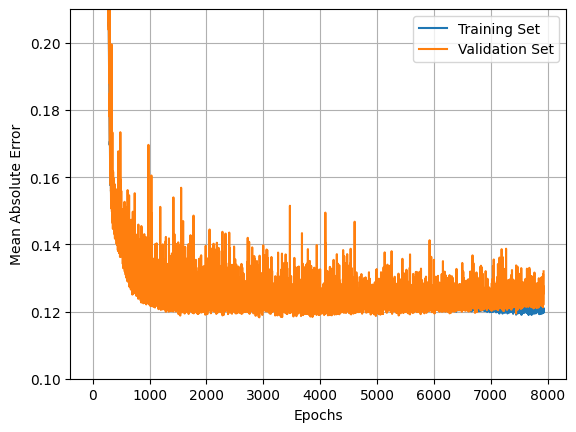

In [91]:
# Plot training history

#mae1 = pd.DataFrame(history.history)
mae1 = pd.read_csv(mydata_path + 'mae_history.csv')
plt.plot(mae1[['loss','val_loss']])
plt.grid(True)
plt.gca().set_ylim(0.1,0.21)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend(['Training Set', 'Validation Set'])


##### Implied Volatilities

In [ ]:
raw = pd.read_csv(mydata_path + 'Implied_Volatility_Data_vFinal.csv')

print(raw.shape)
raw.head()

(125700, 5)


,Date,SPX Return,Time to Maturity in Year,Delta,Implied Volatility Change
0,20140630,0.006678,0.184,0.745927,0.008462
1,20140630,0.006678,2.252,0.286911,0.002024
2,20140630,0.006678,0.124,0.902941,0.019707
3,20140630,0.006678,2.144,0.910926,0.006424
4,20140630,0.006678,1.412,0.885760,0.005673


In [ ]:
# construct the 3 variables
raw['x1'] = raw['SPX Return'] / np.sqrt(raw['Time to Maturity in Year'])
raw['x2'] = raw['SPX Return'] / np.sqrt(raw['Time to Maturity in Year']) * raw['Delta']
raw['x3'] = raw['x2'] * raw['Delta']

# Put the X and Y variable in data frame
y_imp = raw['Implied Volatility Change']
X_imp = raw[['x1', 'x2', 'x3','SPX Return','Time to Maturity in Year','Delta']]

# Divide data into training set and test set(note that random seed is set)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_imp, y_imp, test_size = 0.2, random_state = 100)
# Divide training set into training and validation set
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size = 0.25, random_state = 100)

# Scale features based on Z-score

scaler = StandardScaler()
scaler.fit(X_train1)

Xs_train = scaler.transform(X_train1)
Xs_vals = scaler.transform(X_val1)
Xs_test = scaler.transform(X_test1)
y_train1 = np.asarray(y_train1)
y_val1 = np.asarray(y_val1)
y_test1 = np.asarray(y_test1)

In [ ]:
# Create ML Model

imvol = keras.models.Sequential([Dense(20,activation = "sigmoid",input_shape = (3,)),
                                Dense(20,activation = "sigmoid"),Dense(20,activation = "sigmoid"),
                                Dense(1)])
imvol.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 20)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 941 (3.68 KB)

 Trainable params: 941 (3.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
imvol.compile(loss = "mse",optimizer = "Adam")
#chck_cb = keras.callbacks.ModelCheckpoint("implied_vol_model_vFinal.h5",save_best_only = True)
#early_stop_cb = keras.callbacks.EarlyStopping(patience = 1000,restore_best_weights = True)

In [ ]:

#imvol_his = imvol.fit(Xs_train[:,3:6],y_train1, epochs = 50000, batch_size = 128, verbose = 1, validation_data=(Xs_vals[:,3:6],y_val1))
imvol_his = imvol.fit(Xs_train[:,3:6],y_train1, epochs= 50, batch_size = 128, verbose = 1, validation_data=(Xs_vals[:,3:6],y_val1)) # , callbacks=[chck_cb, early_stop_cb])

Epoch 1/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2013 - val_loss: 8.3996e-05
Epoch 2/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0875e-05 - val_loss: 8.3626e-05
Epoch 3/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3043e-05 - val_loss: 8.3761e-05
Epoch 4/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.1943e-05 - val_loss: 8.2822e-05
Epoch 5/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1315e-05 - val_loss: 8.2517e-05
Epoch 6/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 7.8117e-05 - val_loss: 8.3030e-05
Epoch 7/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.3721e-05 - val_loss: 8.1802e-05
Epoch 8/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.2057e-05 - val_loss: 8.2239e-05
Epoch 9/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1008e-05 - val_loss: 8.0636e-05
Epoch 10/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.8160e-05 - val_loss: 8.1608e-05
Epoch 11/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.

In [ ]:
model_imvol = keras.models.load_model(mydata_path+ "implied_vol_model_vFinal.h5")
mse_test = model_imvol.evaluate(X_scaled_test[:,3:6],y_test,verbose=0)

print('Test Loss(MSE):', mse_test)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

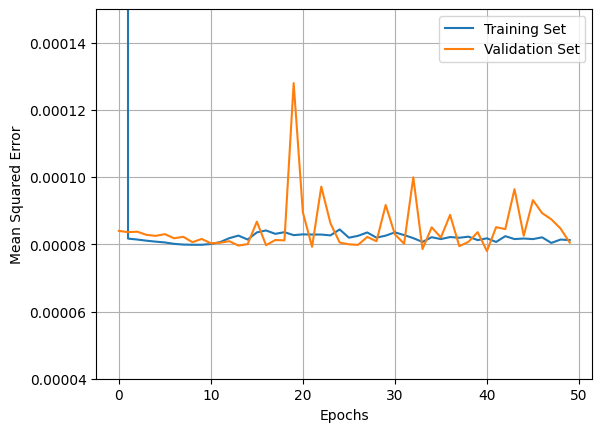

In [ ]:
pd.DataFrame(imvol_his.history).plot()
plt.grid(True)
plt.gca().set_ylim(0.00004, 0.00015)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend(['Training Set', 'Validation Set'])


### Treausry Bond data (PCA and Autoencoders)

In [ ]:
raw_data = pd.read_csv(mydata_path + "TreasuryData.csv")
raw_data.head()

,1yr,2yr,3yr,5yr,7yr,10yr,20yr,30yr
0,-4,-8,-9,-9,-8,-8,-6,-6
1,-1,0,3,4,5,8,9,11
2,0,2,2,2,0,0,-1,-1
3,-3,-7,-6,-5,-2,-2,-1,1
4,-2,-1,-1,1,1,2,3,4


In [ ]:
# Run PCA
pca = PCA(n_components = 2)
pca.fit(raw_data)

X_pca_train = pca.transform(raw_data)
X_recovered_train = pca.inverse_transform(X_pca_train)

mean_squared_error(raw_data, X_recovered_train)

0.8398883281106859

In [ ]:
# The are two hidden layers between inputs and latent variables (with 6 and 4 neurons)
# and two hidden layers (with 4 and 6 neurons) between the latent variable and output
# Activation function is leaky Relu withan alpha parameter of 0.7.

# Set up layers with 6, 4 and 2 neurons for encoder
treas_encoder = keras.models.Sequential([
    Dense(6,input_shape=[len(raw_data.columns)],activation=LeakyReLU(alpha=0.7)),
    Dense(4,input_shape=[6],activation=LeakyReLU(alpha=0.7)),
    Dense(2,input_shape=[4],activation=LeakyReLU(alpha=0.7))])

# Set up layers with 4, 6, and 8 neurons for decoder
treas_decoder = keras.models.Sequential([
    Dense(4,input_shape=[2],activation=LeakyReLU(alpha=0.7)),
    Dense(6,input_shape=[4],activation=LeakyReLU(alpha=0.7)),
    Dense(8,input_shape=[6],activation=LeakyReLU(alpha=0.7))])

# Set up autoencoder
treas_autoencoder = keras.models.Sequential([treas_encoder,treas_decoder])
treas_autoencoder.compile(loss = "mse", optimizer = "adam")

# Checkpoint function is used here to periodically save a copy of the model.
# Currently it is set to save the best performing model
#checkpoint_cb = keras.callbacks.ModelCheckpoint("treas_autoencoder_leakyrelu_multi_layer_vFinal_v2.h5",save_best_only = True, monitor='loss')
# Early stopping stopsr training early if no improvment is shown after a number of epochs equal to patience
#  The model then reverts back to the best weights
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss',patience = 500,restore_best_weights = True,verbose=1)

In [ ]:
treas_history = treas_autoencoder.fit(raw_data,raw_data,epochs = 5000, verbose=1)
#treas_history = treas_autoencoder.fit(raw_data,raw_data,epochs = 5000, callbacks=[checkpoint_cb,early_stopping_cb], verbose=1)
#treas_autoencoder = keras.models.load_model("treas_autoencoder_leakyrelu_multi_layer_vFinal_v2.h5",custom_objects={'LeakyReLU': LeakyReLU(alpha=0.7)})

Epoch 1/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23.7353
Epoch 2/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.2428
Epoch 3/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5634
Epoch 4/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6400
Epoch 5/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5098
Epoch 6/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6835
Epoch 7/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5513
Epoch 8/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3182
Epoch 9/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0856
Epoch 10/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0243
Epoch 11/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9434
Epoch 12/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6375
Epoch 13/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3662
Epoch 14/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2528
Epoch 15/5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

KeyboardInterrupt: 

In [ ]:
mse_test = treas_autoencoder.evaluate(raw_data,raw_data,verbose=0)
print('Neural network mean squared error:', mse_test)


Neural network mean squared error: 0.8063234686851501
